# トヨタ自動車 (``7203``) １分足

### システムパスに一つ上のディレクトリ ``..`` を追加

In [15]:
import sys
sys.path.append('..')

## ライブラリのインポート

In [16]:
import re

import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

## yfinance で OHLC データを読み込む

In [17]:
symbol = '7203.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='1m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-03-06 09:05:00+09:00,2874.0,2877.0,2870.0,2876.0,0,0.0,0.0
2025-03-06 09:06:00+09:00,2876.0,2879.5,2873.5,2873.5,150300,0.0,0.0
2025-03-06 09:07:00+09:00,2873.5,2875.0,2866.5,2871.5,164400,0.0,0.0
2025-03-06 09:08:00+09:00,2872.0,2873.0,2863.5,2866.0,179500,0.0,0.0
2025-03-06 09:09:00+09:00,2865.5,2865.5,2859.0,2860.5,126600,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-06 15:20:00+09:00,2823.0,2823.0,2821.5,2822.0,59600,0.0,0.0
2025-03-06 15:21:00+09:00,2822.5,2823.0,2821.5,2823.0,36600,0.0,0.0
2025-03-06 15:22:00+09:00,2823.0,2823.0,2821.5,2821.5,65700,0.0,0.0


## チャート

### フォントの設定

In [18]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

### mplfinance でプロット

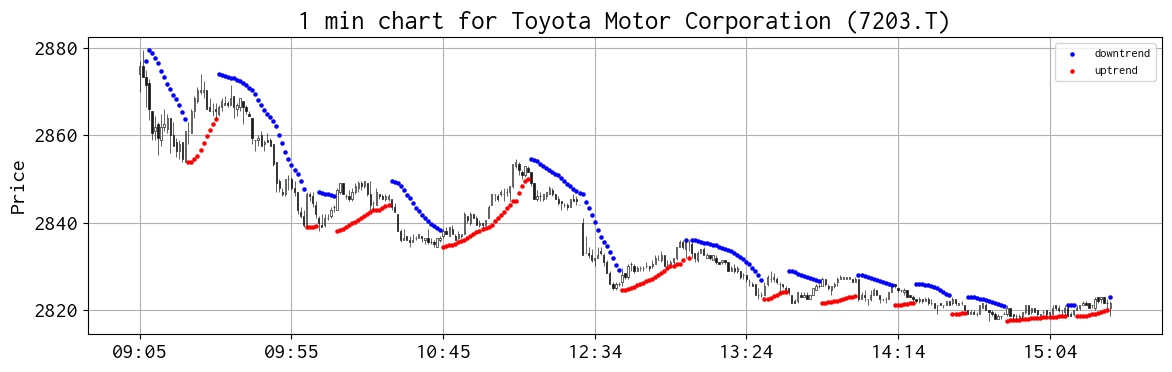

In [19]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(dict_psar['bear'], type='scatter', marker='o', markersize=5, color='blue', label='downtrend', ax=ax),
    mpf.make_addplot(dict_psar['bull'], type='scatter', marker='o', markersize=5, color='red', label='uptrend', ax=ax),
] 
mpf.plot(df, type='candle', style='default', volume=False, datetime_format='%H:%M', addplot=apds, xrotation=0, ax=ax,)

ax.grid()
ax.legend(fontsize=9)

try:
    ax.set_title('1 min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('1 min chart for %s' % symbol)

plt.tight_layout()

pattern = re.compile(r'(.+)\.T')
m = pattern.match(symbol)
if m:
    plt.savefig('report_1m_chart_%s.png' % m.group(1))
else:
    plt.savefig('report_1m_chart_%s.png' % symbol)

plt.show()